<a href="https://colab.research.google.com/github/chodizzle/portfolio1/blob/main/projects/keyword_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import re

In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


<h1> Setup 3 Dataframes from outputs of keyword script </h2>

In [ ]:
df1 = pd.read_csv('tfidf_meats.csv', index_col=0)
df2 = pd.read_csv('tfidf_meats2.csv', index_col=0)
df3 = pd.read_csv('tfidf_meats3.csv', index_col=0)

In [ ]:
df1['version'] = 1
df2['version'] = 2
df3['version'] = 3

In [ ]:
df1 = df1.append([df2, df3])

In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
derp = df1.groupby(['category', 'keyword']).size().unstack(fill_value=0).sum().to_frame()

In [ ]:
derp.rename(columns={0:'count'}, inplace=True)

In [ ]:
singles = derp[derp['count'] == 1].index

In [ ]:
df_trim = df1[df1['counts'] > 25]

In [ ]:
gb = df_trim[df_trim['category'] == 'Ground Beef']
gb

,keyword,tfidf,counts,category,version
0,fine raw,0.406718,362,Ground Beef,1
1,chub,0.351619,524,Ground Beef,1
2,fine,0.284917,634,Ground Beef,1
3,raw,0.248513,715,Ground Beef,1
4,fireclsbulk,0.247374,222,Ground Beef,1
...,...,...,...,...,...
3544,8mm chk,0.035986,38,Ground Beef,3
3545,chk rl,0.035986,38,Ground Beef,3
3547,rl bulgogi,0.035039,37,Ground Beef,3
3548,bf psmo,0.034750,46,Ground Beef,3


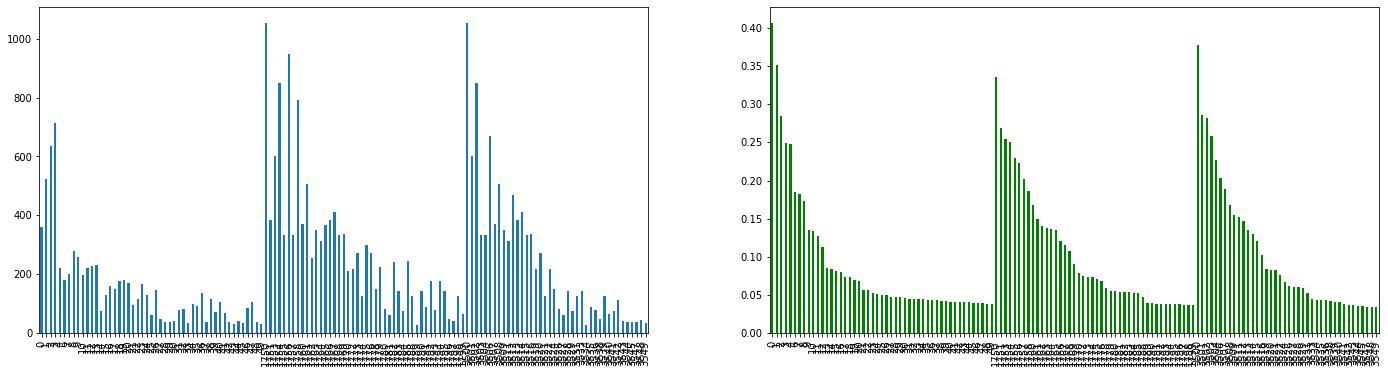

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

gb['counts'].plot.bar(ax=ax[0])
gb['tfidf'].plot.bar(ax=ax[1], color='green')

# show that tfidf and counts basically correlate. Since we  chose only the top 
# tfidf scores and have tfidf-count correlation, we can focus on large count 
# items for most effective keywords to use for cleaning

In [ ]:
gb.to_csv('gb.csv')